<a href="https://colab.research.google.com/github/brianMutea/Spam-Classification-with-TensorFlow-Keras-NLTK-and-Comet/blob/main/NLTK_NLP_data_preprocessing_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from platform import python_version
print(python_version())

3.8.10


In [99]:
# This requirment is needed in order to use nltk in this note book
# Notice that I have commented it since I already have nltk installed
# ! pip install nltk

In [100]:
# Import the required libraries
import nltk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenization

During tokenization, we turn a string of sentences into a list of lexical tokens which are also strings with assigned and identifeid meaning.

A tokenizer does this king of lexical analysis. It is used with a parser to study the syntax of programming languages, webpages and other types of documents.

### Types of tokenization
* Word tokenization
* Sentence tokenization

In [102]:
#Let's use a quote from Timothy Robinson
text_example = "One cannot create a mosaic without the hard small marble bits known as 'facts' or 'data'; what matters, however, is not so much the individual bits as the sequential patterns into which you organize them, then break them up and reorganize them!"

text_example

text_example2 = """One cannot create a mosaic without the hard small marble bits known as 'facts' or 'data'.
What matters, is not so much the individual bits as the sequential patterns into which you organize them, then break them up and reorganize them!"""

In [103]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [104]:
word_tokenized_sent = word_tokenize(text_example.casefold())
print(word_tokenized_sent)

['one', 'can', 'not', 'create', 'a', 'mosaic', 'without', 'the', 'hard', 'small', 'marble', 'bits', 'known', 'as', "'facts", "'", 'or', "'data", "'", ';', 'what', 'matters', ',', 'however', ',', 'is', 'not', 'so', 'much', 'the', 'individual', 'bits', 'as', 'the', 'sequential', 'patterns', 'into', 'which', 'you', 'organize', 'them', ',', 'then', 'break', 'them', 'up', 'and', 'reorganize', 'them', '!']


In [105]:
sentence_tokenized = sent_tokenize(text_example2.casefold())
sentence_tokenized

["one cannot create a mosaic without the hard small marble bits known as 'facts' or 'data'.",
 'what matters, is not so much the individual bits as the sequential patterns into which you organize them, then break them up and reorganize them!']

# Removing Stopwords

Stopwords are words that don't add any meaning to a sentence but only add to the speech fluidity. For NLP in most cases these words are not required.

In [106]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
from nltk.corpus import stopwords

eng_stopwords = stopwords.words('english')
print(eng_stopwords)
tokens_no_stopwords = [word for word in word_tokenized_sent if word not in eng_stopwords]

print(tokens_no_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Stemming
* Stemming enables reduce the words to their roots. For example "testing", "tester" share the root "test"
* A stem is part of a word, that is common to all of its inflected variants.

* Stemming is the process of reducing such inflected words to their word stem.

* Doing this allows zeroing in to the base og the word rather than all the details of how it's being used.
* There are various types of stemmer
    * [Porter Stemmer](https://vijinimallawaarachchi.com/2017/05/09/porter-stemming-algorithm/) -- this is the most commonly used stemmer in linguistics
    * **Snowball Stemmer** -- This is a multilingual stemmer that supports other languages too. It is more aggressive than the porter and has more computational speed.
    * **Lancaster Stemmer** -- they are more aggressive and mote dynamic than the other two. they are also very very confusing when dealing with small words and are also not as efficient. 
     
*  Stemming is an important part of the pipelining process in Natural language processing.


[There are several different algorithms for stemming, including the Porter stemmer, Snowball stemmer, and the Lancaster stemmer. The Porter stemmer is the most widely used algorithm, and it is based on a set of heuristics that are used to remove common suffixes from words. The Snowball stemmer is a more advanced algorithm that is based on the Porter stemmer, but it also supports several other languages in addition to English. The Lancaster stemmer is a more aggressive stemmer and it is less accurate than the Porter stemmer and Snowball stemmer.](https://www.geeksforgeeks.org/introduction-to-stemming/)

In [108]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(token) for token in tokens_no_stopwords]
print(f"\n===Unstemmed tokens====\n {tokens_no_stopwords}")
print(f"\n===Unstemmed tokens====\n {stemmed_tokens}")


===Unstemmed tokens====
 ['one', 'create', 'mosaic', 'without', 'hard', 'small', 'marble', 'bits', 'known', "'facts", "'", "'data", "'", ';', 'matters', ',', 'however', ',', 'much', 'individual', 'bits', 'sequential', 'patterns', 'organize', ',', 'break', 'reorganize', '!']

===Unstemmed tokens====
 ['one', 'creat', 'mosaic', 'without', 'hard', 'small', 'marbl', 'bit', 'known', "'fact", "'", "'data", "'", ';', 'matter', ',', 'howev', ',', 'much', 'individu', 'bit', 'sequenti', 'pattern', 'organ', ',', 'break', 'reorgan', '!']


In [109]:
some_txt = "The crew of the USS Discovery discovered many discoveries."

def stem_text(text):
    token_lst = word_tokenize(some_txt.casefold())
    token_no_stpw = [word for word in token_lst if word not in eng_stopwords]
    inco_stemmed_tokens = [stemmer.stem(token) for token in token_no_stpw]
    
    return inco_stemmed_tokens
    
stem_text(some_txt)

['crew', 'uss', 'discoveri', 'discov', 'mani', 'discoveri', '.']

# Lemmatization

* Unlike the Stemmer, it takes into account the context of the word thus making it less prone to errors.
* To do this, it is essential to have comprehensive dictionaries that the algorithm may use to connect the word to its lemma.
* The **Lemma** is a word that represents a whole group of words called **Lexeme**.

In [110]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [111]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [112]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [113]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer .lemmatize(token) for token in tokens_no_stopwords]
print(lemmatized_tokens)

['one', 'create', 'mosaic', 'without', 'hard', 'small', 'marble', 'bit', 'known', "'facts", "'", "'data", "'", ';', 'matter', ',', 'however', ',', 'much', 'individual', 'bit', 'sequential', 'pattern', 'organize', ',', 'break', 'reorganize', '!']


# Part of Speech Tagging

In [114]:
pos_tagged_tokes = nltk.pos_tag(tokens_no_stopwords)
print(pos_tagged_tokes)

[('one', 'CD'), ('create', 'NN'), ('mosaic', 'NN'), ('without', 'IN'), ('hard', 'JJ'), ('small', 'JJ'), ('marble', 'JJ'), ('bits', 'NNS'), ('known', 'VBN'), ("'facts", 'NNS'), ("'", 'POS'), ("'data", 'NNS'), ("'", 'POS'), (';', ':'), ('matters', 'NNS'), (',', ','), ('however', 'RB'), (',', ','), ('much', 'JJ'), ('individual', 'JJ'), ('bits', 'NNS'), ('sequential', 'JJ'), ('patterns', 'NNS'), ('organize', 'RB'), (',', ','), ('break', 'JJ'), ('reorganize', 'NN'), ('!', '.')]


In [115]:
nltk.download('tagsets')

# nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

#Using Named Entity Recognition (NER)

A text may contain noun phrases that refer to organizations, people, specific locations, etc. These phrases are called named entities, and we can use named entity recognition to determine what kind of named entities are in your text data.

In [116]:

nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [117]:
%pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
named_ent_txt = "I'm trying to track down a guy named Josh Doew who worked in mining in Ouray back in the 1960's."

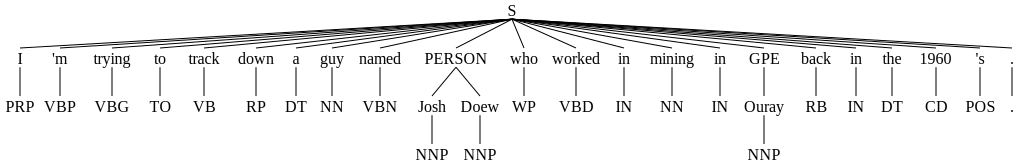

In [127]:
chunked_text = nltk.ne_chunk(nltk.pos_tag(word_tokenize(named_ent_txt)))
# tree = nltk.ne_chunk(pos_tagged_tokes, binary=False)
chunked_text

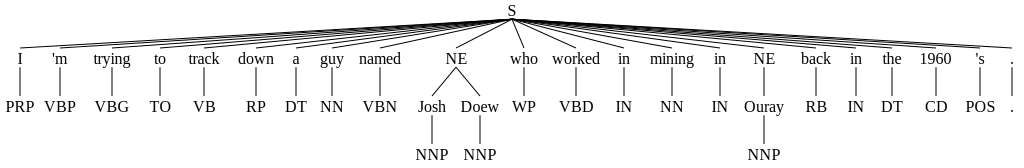

In [119]:
# When binary=True

chunked_text = nltk.ne_chunk(nltk.pos_tag(word_tokenize(named_ent_txt)), binary=True)
# tree = nltk.ne_chunk(pos_tagged_tokes, binary=False)
chunked_text

Create a list of all the named entities...extract!

In [125]:
from nltk.tree import Tree

def get_named_entities(text):
  tree = nltk.ne_chunk(nltk.pos_tag(word_tokenize(text)), binary=True)
  continuous_chunk = []
  current_chunk = []

  for i in tree:
    if type(i) == Tree:
      current_chunk.append(" ".join([token for token, pos in i.leaves()]))
      if current_chunk:
        named_entity = " ".join(current_chunk)
        if named_entity not in continuous_chunk:
          continuous_chunk.append(named_entity)
          current_chunk = []
      else:
        continue
  return continuous_chunk



In [126]:
get_named_entities(named_ent_txt)

['Josh Doew', 'Ouray']

# Word Frequency Distribution

We can identify words that appear frequently in out text

data by buiding a frequency distribution. 

To do this, we use the FreqDist module in NLTK.

In [128]:
from nltk import FreqDist

frequency_distribution = FreqDist(tokens_no_stopwords)
frequency_distribution.most_common(10)

[(',', 3),
 ('bits', 2),
 ("'", 2),
 ('one', 1),
 ('create', 1),
 ('mosaic', 1),
 ('without', 1),
 ('hard', 1),
 ('small', 1),
 ('marble', 1)]

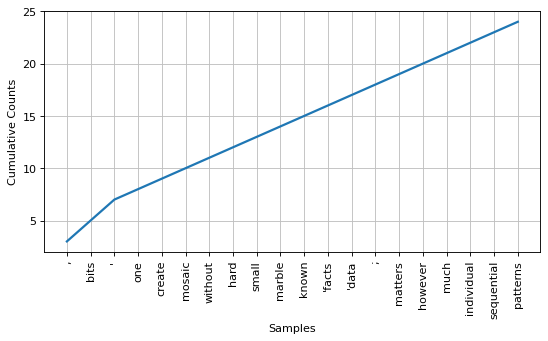

In [135]:
# Visualize the distribution
from matplotlib.pyplot import figure

figure(figsize=(8, 4), dpi=80)

frequency_distribution.plot(20, cumulative=True)